<a href="https://www.kaggle.com/code/sjagkoo7/data-analysis-regression-classification?scriptVersionId=133122014" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


In [2]:
placement=pd.read_csv("/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv")
placement.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
placement.info()
#placement.isna().sum()
#placement.shape
#len(placement)
#placement.columns
#len(placement.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
placement.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [5]:
#Drop the sl_no becuase it is ir-relavent and no use.
placement.drop('sl_no',axis=1,inplace=True)

In [6]:
placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [7]:
#co-relation
corr=placement.corr()
corr

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


<AxesSubplot:>

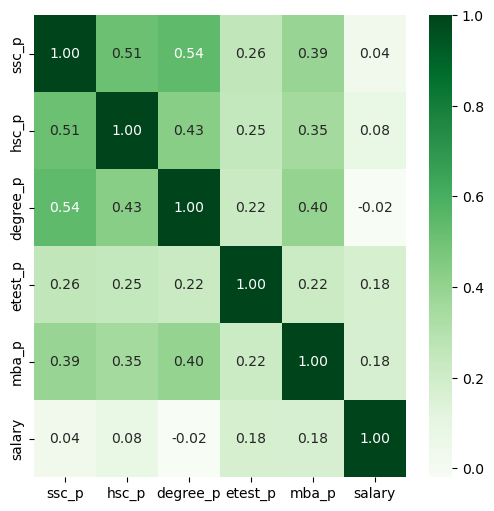

In [8]:
#Heatmap
plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='Greens')

# Exploratory Data Analysis

#### Pandas Profiler's Interactive Report

In [9]:
placement.profile_report(title='Placement - Report',progress_bar=False)

> 67 Missing values in Salary for students who didn't get placed. NaN Value needs to be filled.

#### Feature: Gender
#### Does gender affect placements?

In [10]:
placement.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

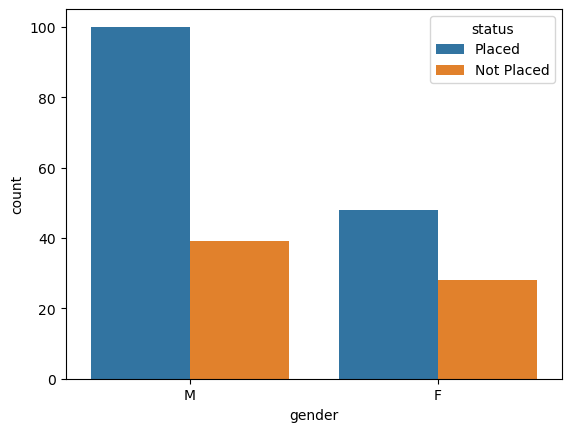

In [11]:
sns.countplot(data=placement,x='gender',hue='status')

Text(0.5, 0, 'Salary (100k)')

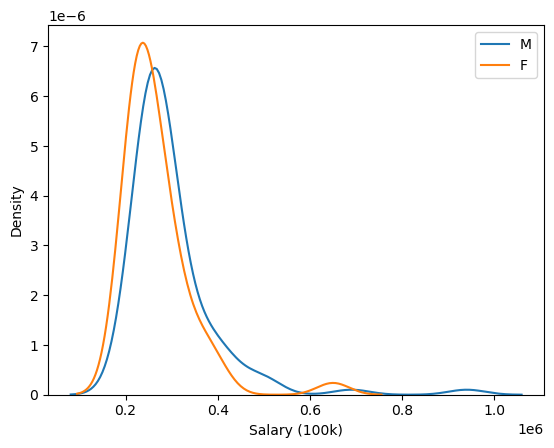

In [12]:
#This plot ignores NaN values for salary, igoring students who are not placed
sns.kdeplot(placement.salary[placement.gender=='M'])
sns.kdeplot(placement.salary[placement.gender=='F'])
plt.legend(['M','F'])
plt.xlabel("Salary (100k)")

<AxesSubplot:xlabel='salary', ylabel='gender'>

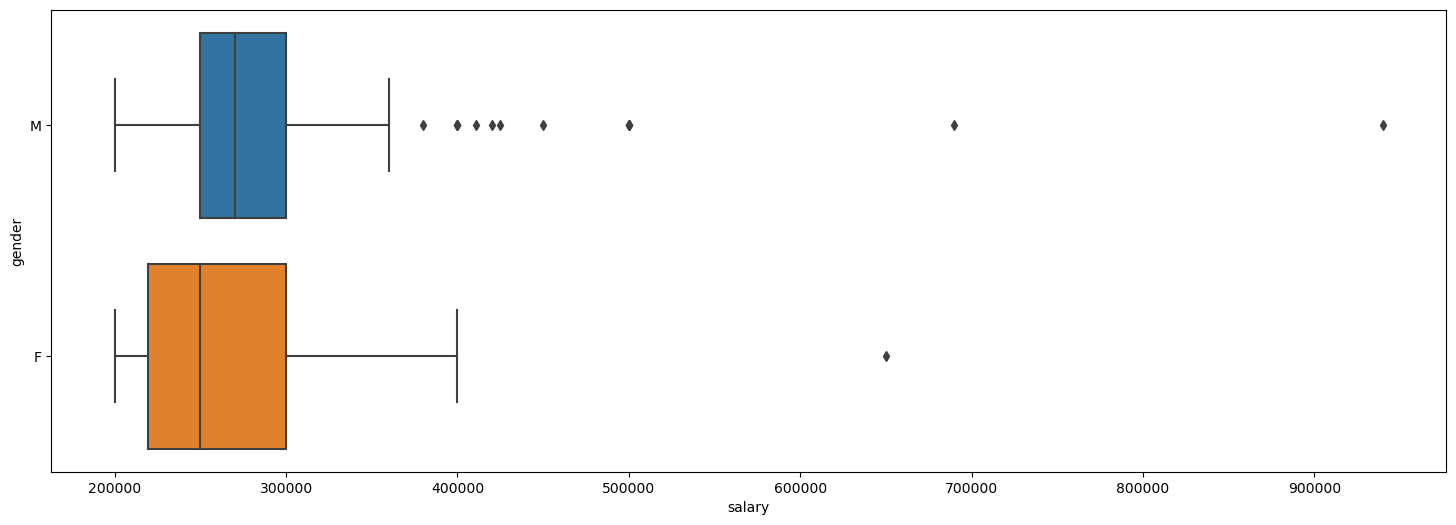

In [13]:
plt.figure(figsize=(18,6))
sns.boxplot(x="salary",y="gender",data=placement)

In [14]:
placement.gender[placement.status=="Not Placed"].value_counts()


M    39
F    28
Name: gender, dtype: int64

> Insights
* We have  139 Male studets and 76 Female students.
* 28 Female and 39 Male students are not placed. Male students have comparatively higher placemets.
* More outliers on Male -> Male students are getting high salary jobs.
* Male students are offered slightly greater salary than female on an average.

#### Feature: ssc_p (Secondary Education percentage), ssc_b (Board Of Education)
##### Does Secondary Education affect placements?

Text(0.5, 0, 'Secondary Education Percentage')

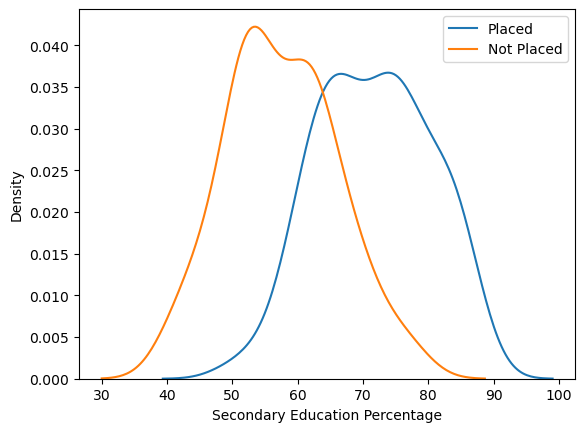

In [15]:
sns.kdeplot(placement.ssc_p[placement.status=='Placed'])
sns.kdeplot(placement.ssc_p[placement.status=='Not Placed'])
plt.legend(['Placed','Not Placed'])
plt.xlabel('Secondary Education Percentage')


> Insight
* All students with Secondary Education Percentage above 90% are placed
* All students with Secondary Education Percentage below 30% are not-placed
* Students with good Secondary Education Percentage are placed on average.


<AxesSubplot:xlabel='ssc_b', ylabel='count'>

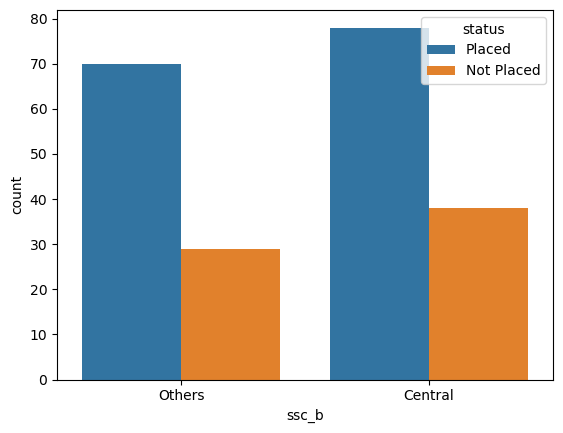

In [16]:
sns.countplot(x="ssc_b",hue='status',data=placement)

> Board Of Education does not affect Placement Status much

<AxesSubplot:xlabel='salary', ylabel='ssc_b'>

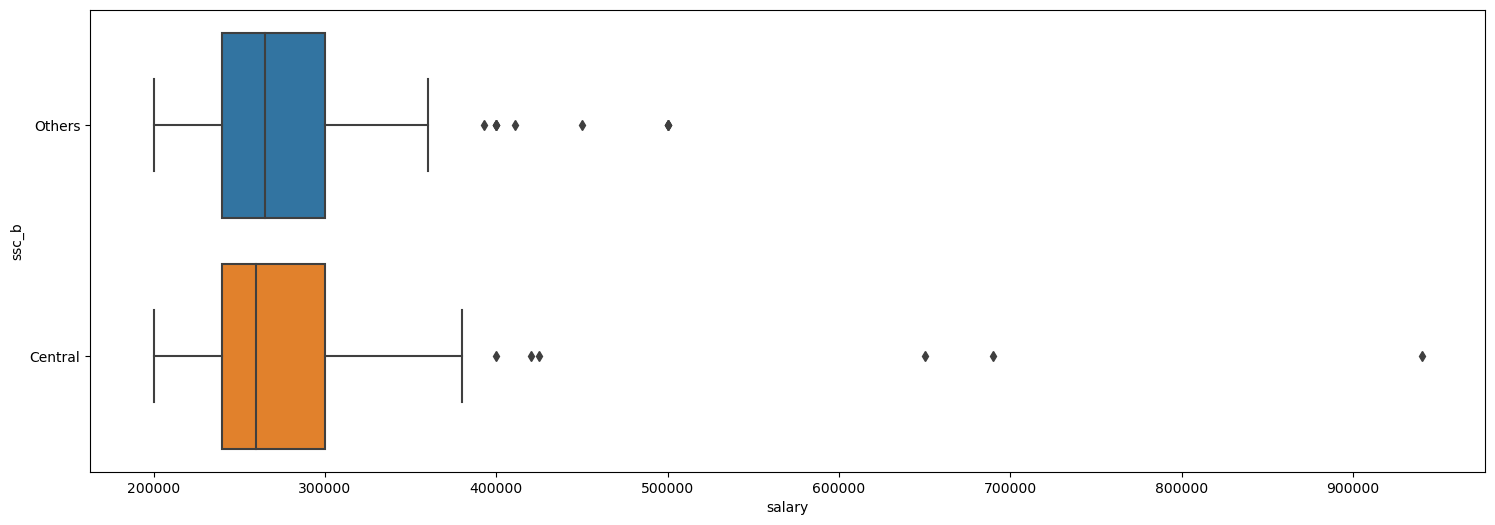

In [17]:
plt.figure(figsize=(18,6))
sns.boxplot(x='salary',y='ssc_b',data=placement)

> Outliers on both, but students from Central Board are getting the highly paid jobs.

<AxesSubplot:xlabel='ssc_p', ylabel='salary'>

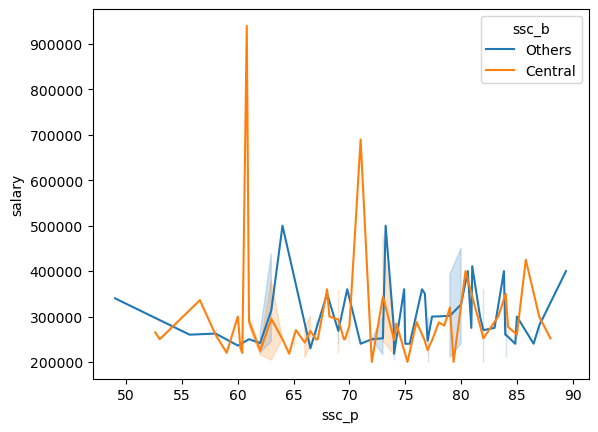

In [18]:
sns.lineplot(x="ssc_p",y="salary",hue='ssc_b',data=placement)

> Insight
* No specific pattern (correlation) between Secondary Education Percentage and Salary.
* Board of Education is Not Affecting Salary

#### Feature: hsc_p (Higher Secondary Education percentage), hsc_b (Board Of Education), hsc_s (Specialization in Higher Secondary Education
##### Does Higher Secondary School affect Placements?

Text(0.5, 0, 'Higher Secondary Education Percentage')

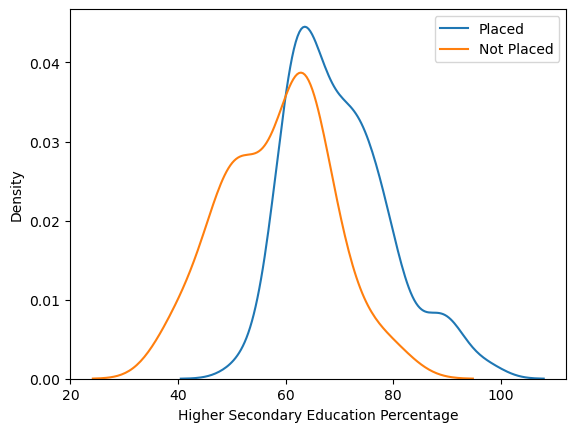

In [19]:
#hsc_p,hsc_b,hsc_s
sns.kdeplot(placement.hsc_p[placement.status=='Placed'])
sns.kdeplot(placement.hsc_p[placement.status=='Not Placed'])
plt.legend(['Placed','Not Placed'])
plt.xlabel("Higher Secondary Education Percentage")

> Insight
* All students with Higher Secondary Education Percentage above 95% are placed
* All students with Higher Secondary Education Percentage below 40% are not-placed
* More placements for percentage above 65%

<AxesSubplot:xlabel='hsc_b', ylabel='count'>

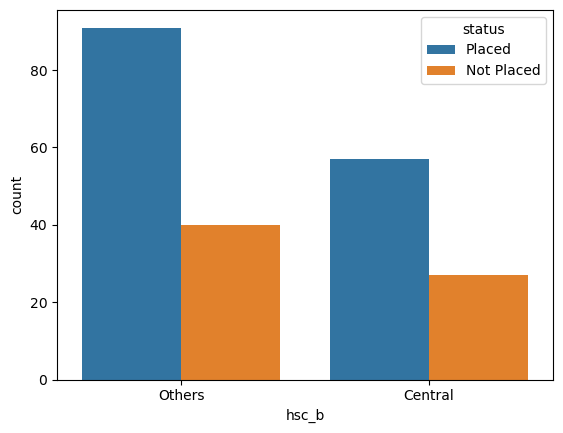

In [20]:
sns.countplot(x='hsc_b',hue='status',data=placement)

> Education Board again, doesn't affect placement status much

<AxesSubplot:xlabel='hsc_s', ylabel='count'>

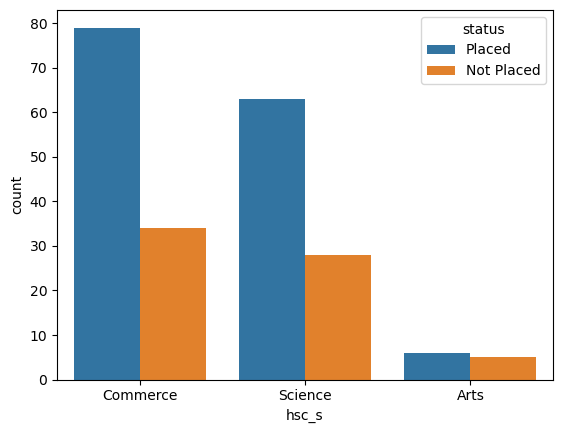

In [21]:
sns.countplot(x='hsc_s',hue='status',data=placement)

> We have very less students with Arts specialization.

<AxesSubplot:xlabel='salary', ylabel='hsc_b'>

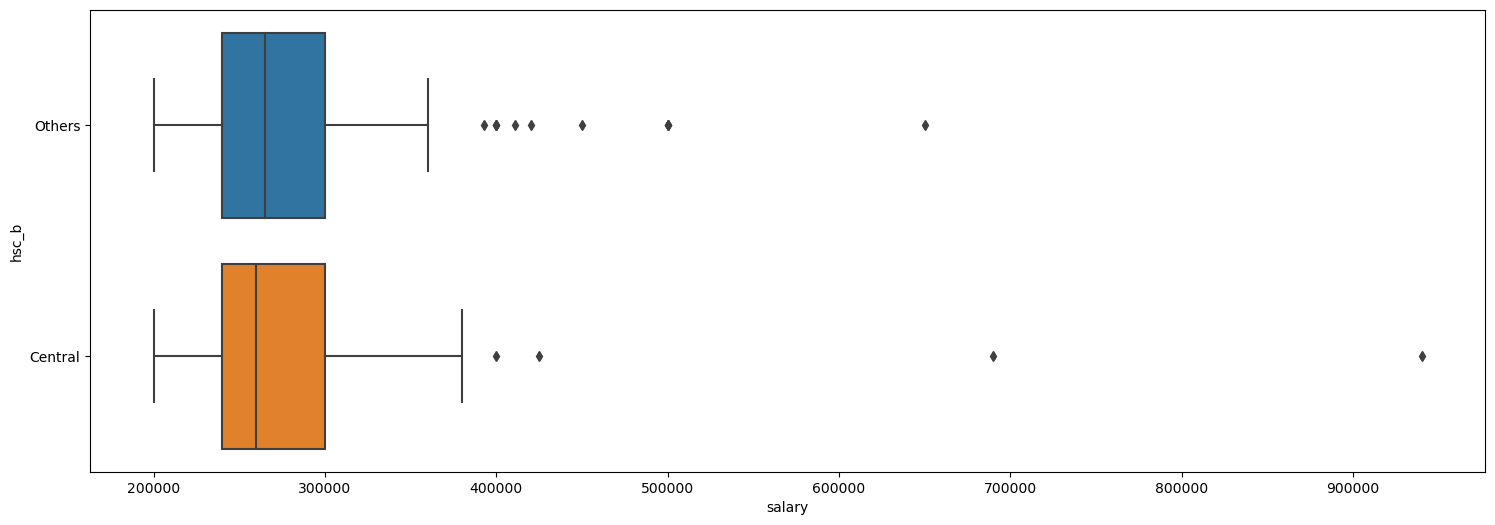

In [22]:
plt.figure(figsize=(18,6))
sns.boxplot(x='salary',y='hsc_b',data=placement)

> Insight
* Outliers on both, board doesn't affect getting highly paid jobs. Highest paid job was obtailed by student from Central Board though.

<AxesSubplot:xlabel='salary', ylabel='hsc_s'>

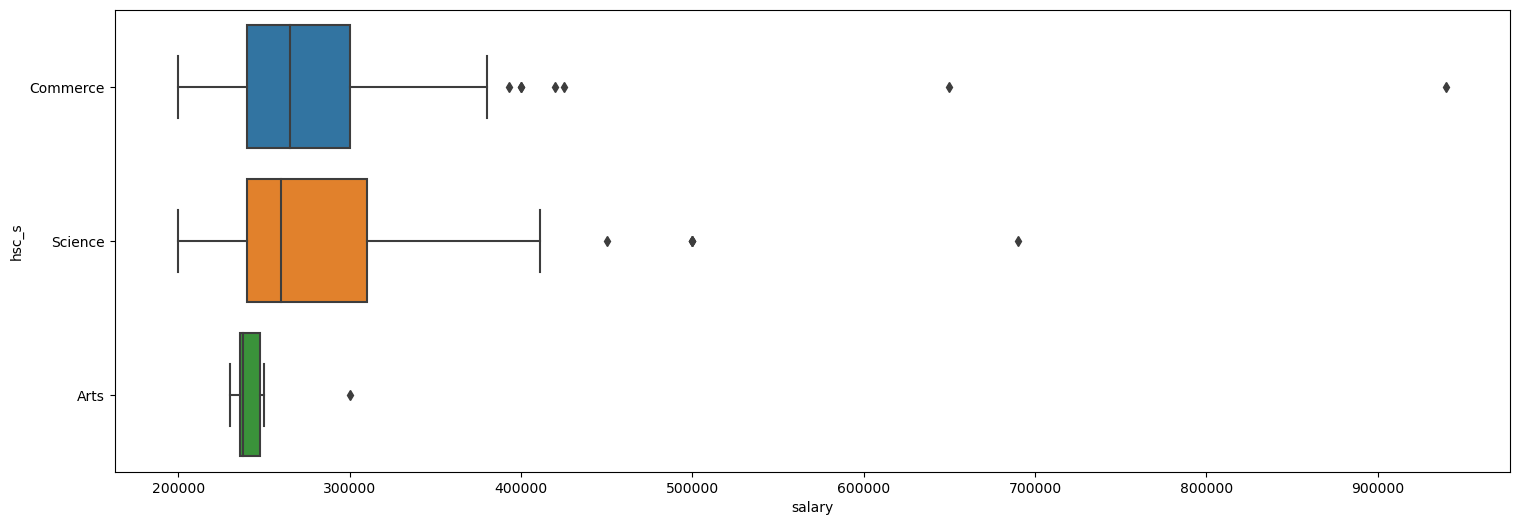

In [23]:
plt.figure(figsize=(18,6))
sns.boxplot(x='salary',y='hsc_s',data=placement)

> Insight
*  samples of students with Arts Major,aren't getting good salaries.
* Commerse students have slightly better placement status.

<AxesSubplot:xlabel='hsc_p', ylabel='salary'>

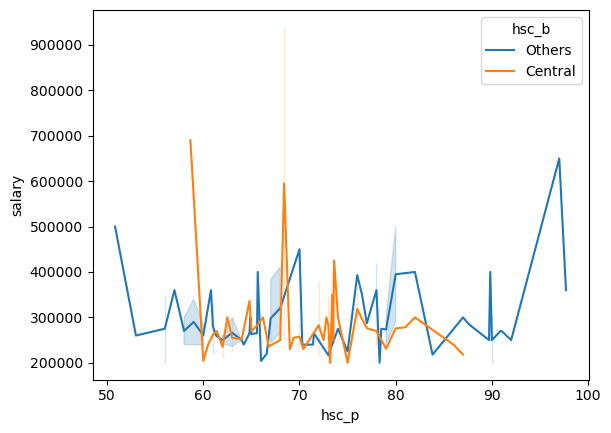

In [24]:
sns.lineplot(x='hsc_p',y='salary',hue='hsc_b',data=placement)

> Insight
* High salary from both Central and Other.
* High salary for both high and low percentage.
* both these feature doesnot affect salary.

<AxesSubplot:xlabel='hsc_p', ylabel='salary'>

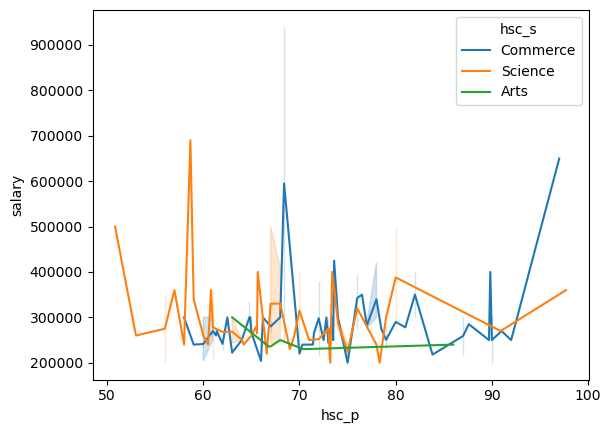

In [25]:
sns.lineplot(x='hsc_p',y='salary',hue='hsc_s',data=placement)

> Insight
* Student with Art Specialization surprisingly have comparatively low salary

#### Feature: degree_p (Degree Percentage), degree_t (Under Graduation Degree Field)
##### Does Under Graduate affect placements?

<AxesSubplot:xlabel='degree_t', ylabel='count'>

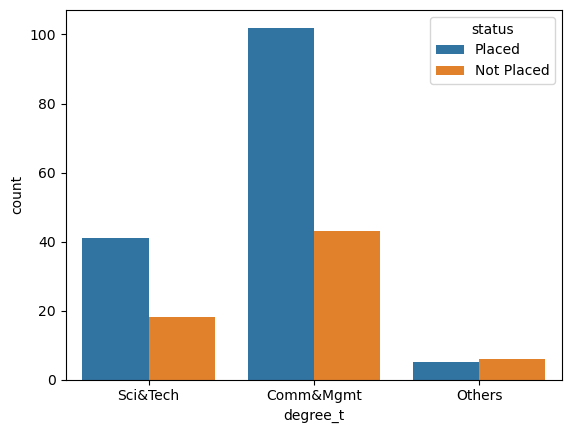

In [26]:
sns.countplot(data=placement,hue='status',x='degree_t')

> Insight
* We have very less students with "Other". We cant make decision from few cases.
* Placement for Comm & Mgmt is high as comapre to other degree field.

Text(0.5, 0, 'Under Graduate Percentage')

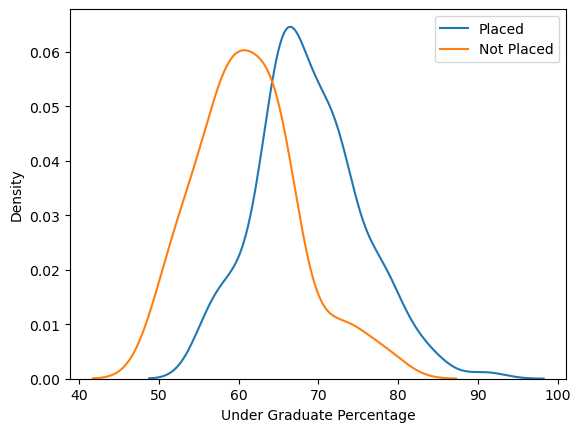

In [27]:
sns.kdeplot(placement.degree_p[placement.status=='Placed'])
sns.kdeplot(placement.degree_p[placement.status=='Not Placed'])
plt.legend(['Placed','Not Placed'])
plt.xlabel("Under Graduate Percentage")

<AxesSubplot:xlabel='salary', ylabel='degree_t'>

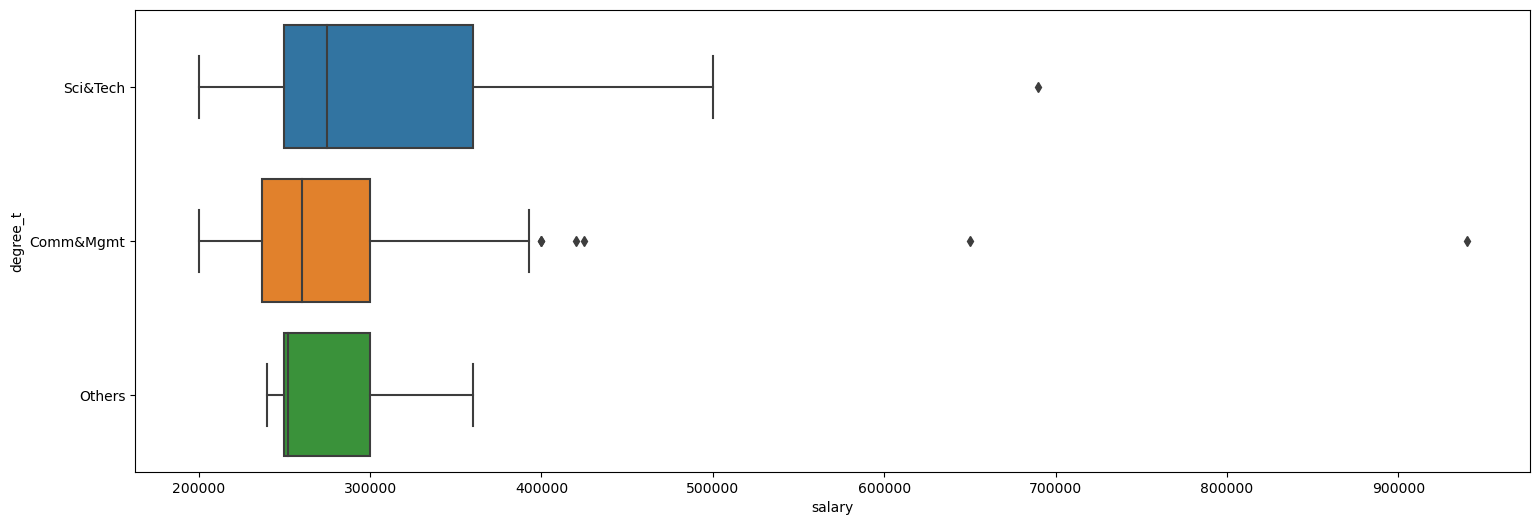

In [28]:
plt.figure(figsize=(18,6))
sns.boxplot(data=placement,x='salary',y='degree_t')

> Insight
* comm & mgmt are getting more high paid jobs which leads to outliers

<AxesSubplot:xlabel='degree_p', ylabel='salary'>

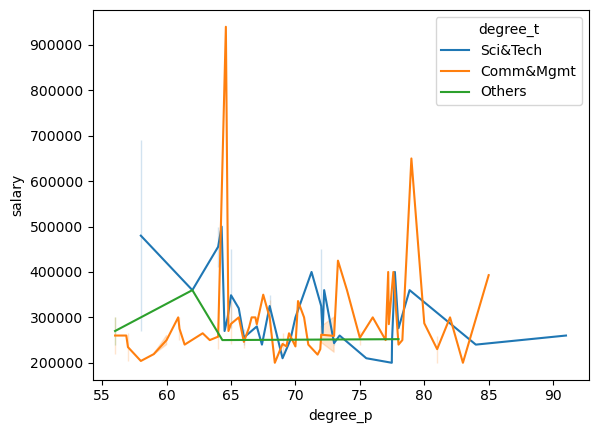

In [29]:
sns.lineplot(data=placement,x='degree_p',y='salary',hue='degree_t')

> Insight
* min.55 degree percentage to get placement.
* comm & mgmt has received highest and degree percentage around 65
* Percentage does not seem to affect salary

#### Feature: workex (Work Experience)
##### Does Work Experience affect placements?

<AxesSubplot:xlabel='workex', ylabel='count'>

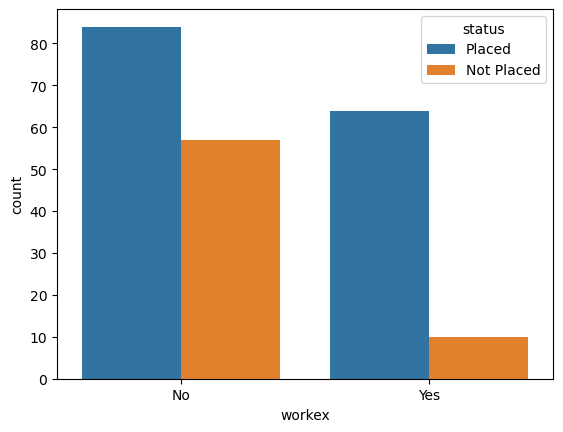

In [30]:
sns.countplot(data=placement,x='workex',hue='status')

> Insight
* chances of placement for having work experience is high


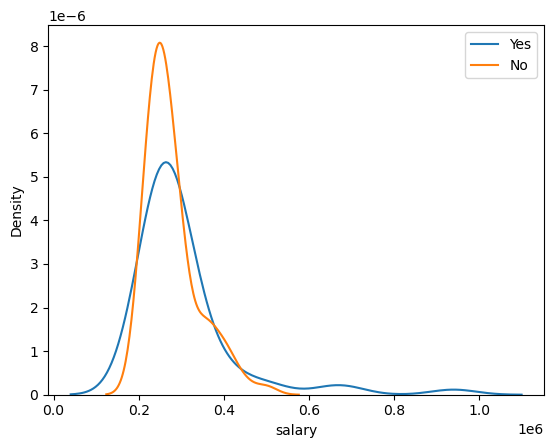

In [31]:
sns.kdeplot(placement.salary[placement.workex=='Yes'])
sns.kdeplot(placement.salary[placement.workex=='No'])
plt.legend(['Yes','No'])

<AxesSubplot:xlabel='salary', ylabel='workex'>

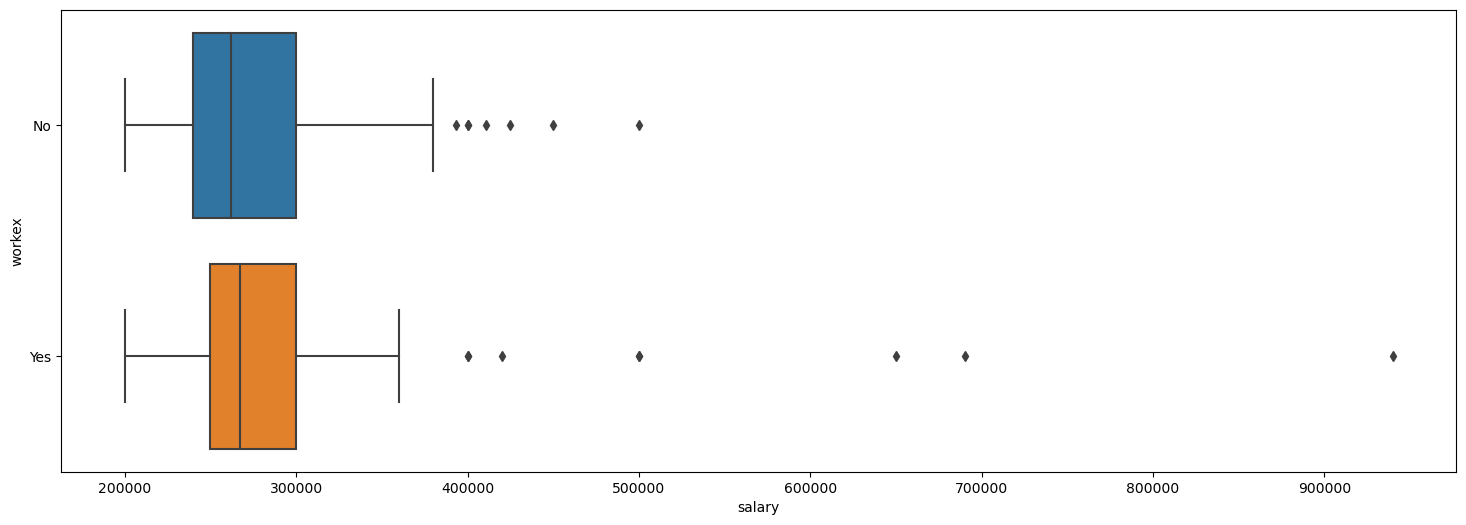

In [32]:
plt.figure(figsize=(18,6))
sns.boxplot(data=placement,x='salary',y='workex')

> Insight
* Work experience Yes getting high paid jobs as compare to No
* Outliers are for Yes and No both end

#### Feature: etest_p (Employability test percentage)
##### Does Employability test percentage affect placements?

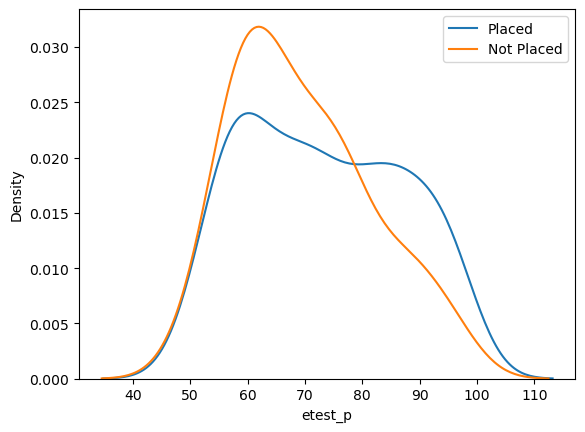

In [33]:
sns.kdeplot(placement.etest_p[placement.status=='Placed'])
sns.kdeplot(placement.etest_p[placement.status=='Not Placed'])
plt.legend(['Placed','Not Placed'])

> Insight
* High overlap -> It does not affect placement status much
* More "Not Placed" on percentage 50-70 range and more placed on 80% percentage range

<AxesSubplot:xlabel='etest_p', ylabel='salary'>

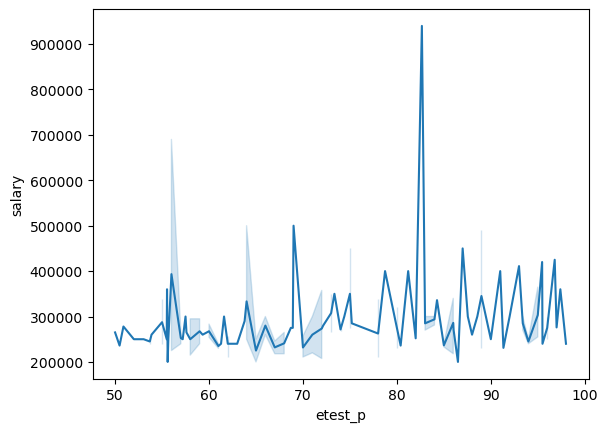

In [34]:
sns.lineplot(data=placement,x='etest_p',y='salary')

> Insight
* This feature surprisingly does not affect placements and salary much

#### Feature: specialisation (Post Graduate Specialization)
##### Does specialisation affect placements?

<AxesSubplot:xlabel='specialisation', ylabel='count'>

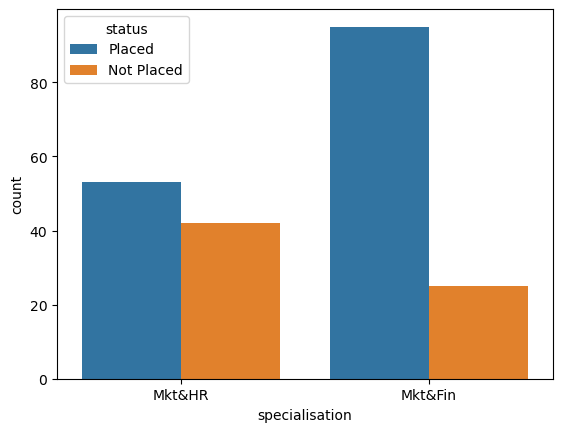

In [35]:
sns.countplot(data=placement,x='specialisation',hue='status')

> Insight
* This feature **affects** Placement status.
* Comparitively very low not-placed students in Mkt&Fin Section

<AxesSubplot:xlabel='salary', ylabel='specialisation'>

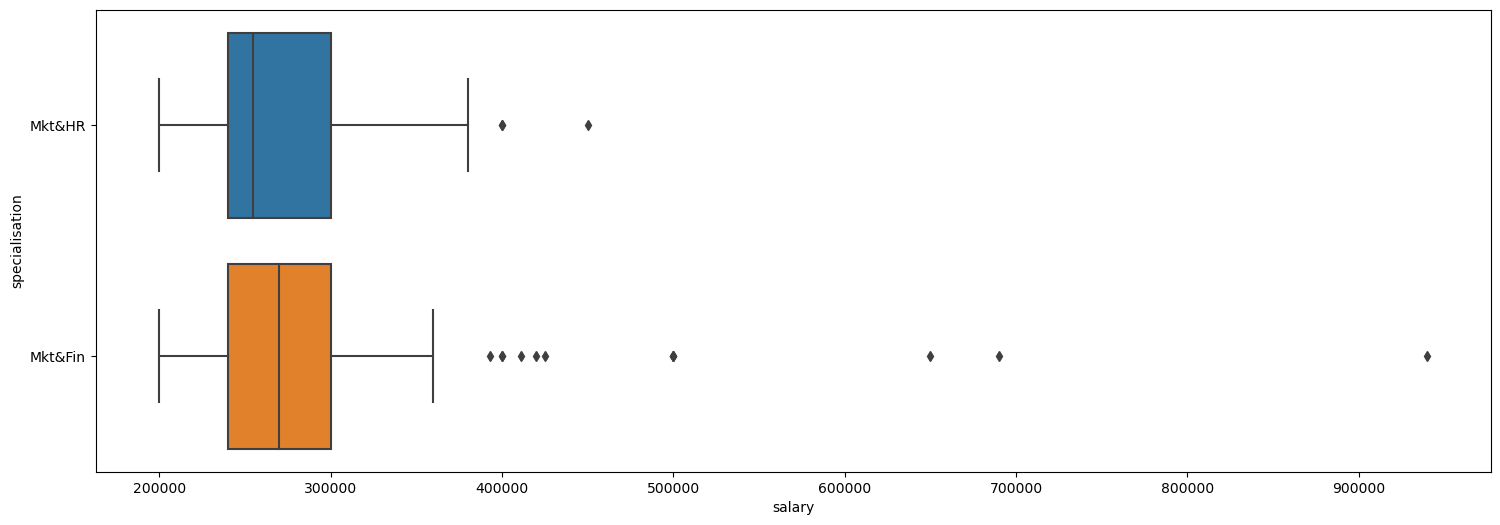

In [36]:
plt.figure(figsize=(18,6))
sns.boxplot(data=placement,x='salary',y='specialisation')

> Insight
* More Highly Paid Jobs for Mkt&Fin students

#### Feature: mba_p (MBA percentage)
##### Does MBA Percentage affect placements?

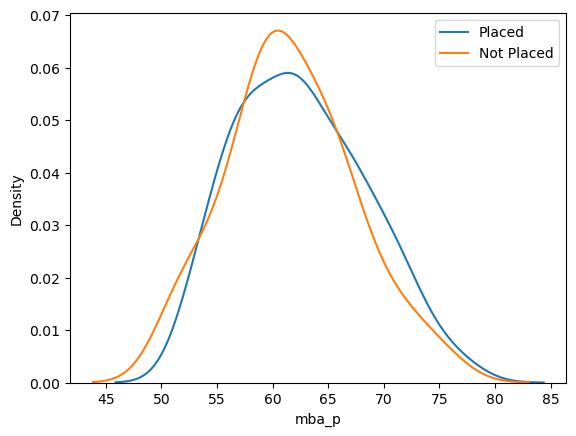

In [37]:
sns.kdeplot(placement.mba_p[placement.status=="Placed"])
sns.kdeplot(placement.mba_p[placement.status=="Not Placed"])
plt.legend(['Placed','Not Placed'])

> Insight
* More Placement after 52 mba_p

<AxesSubplot:xlabel='mba_p', ylabel='status'>

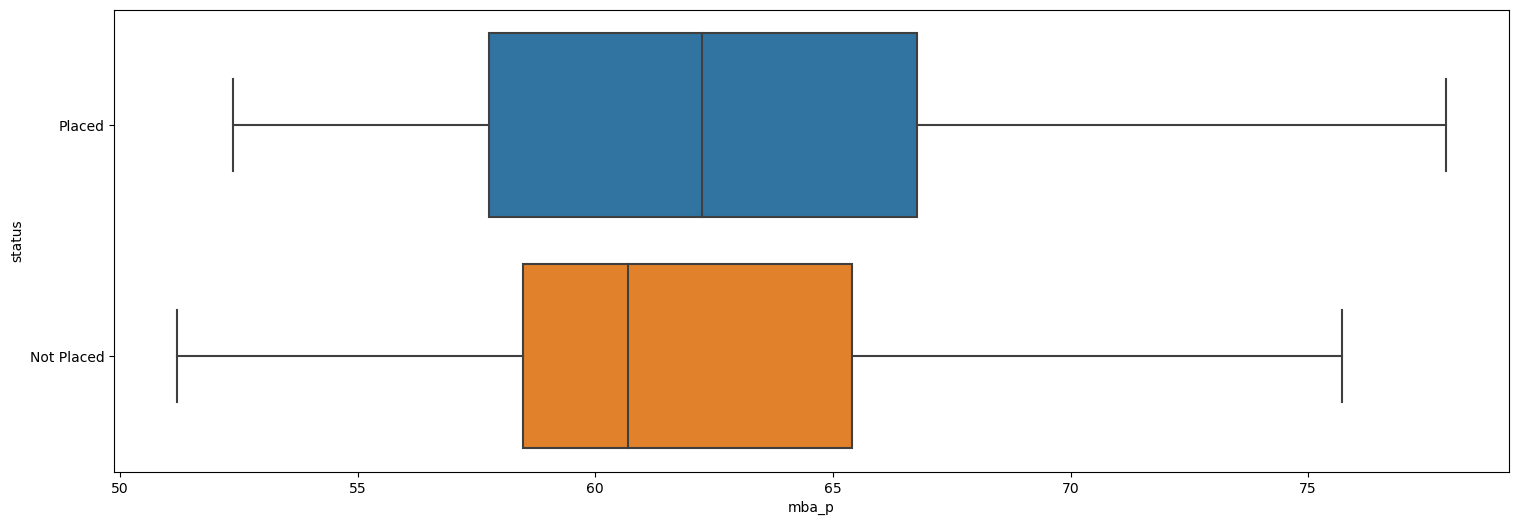

In [38]:
plt.figure(figsize=(18,6))
sns.boxplot(data=placement,x='mba_p',y='status')

> Insight
* there is no outlier so mba_p doesn't have much effect.

<AxesSubplot:xlabel='mba_p', ylabel='salary'>

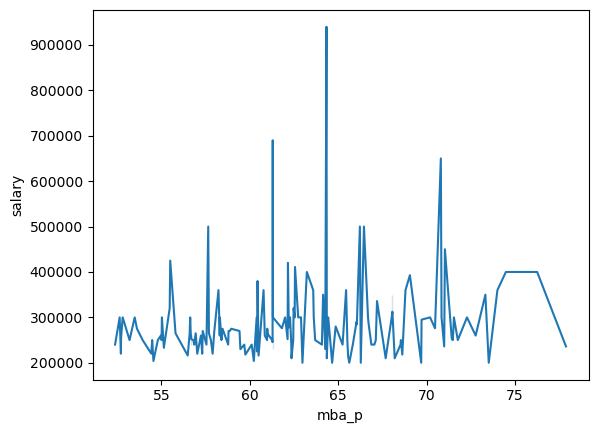

In [39]:
sns.lineplot(data=placement,x='mba_p',y='salary')

> Insight
* MBA Percentage also deos not affect salary much

# Feature Selection

> Using Only following features (Ignoring Board of Education -> they didnt seem to have much effect)
* Gender
* Secondary Education percentage
* Higher Secondary Education Percentsge
* Specialization in Higher Secondary Education
* Under Graduate Dergree Percentage
* Under Graduation Degree Field
* Work Experience
* Employability test percentage
* Specialization
* MBA Percentage 

Will compute feature importance in coming cells on.

# Data Pre-Processing

In [40]:
data=placement.copy()

In [41]:
placement.drop(['ssc_b','hsc_b'],axis=1,inplace=True)

# Feature Encoding

In [42]:
#categorical feature :['gender','hsc_s','degree_t','workex','specialisation','status']
# We have to encode gender,hsc_s, degree_t, workex, specialisation and status
placement.dtypes

gender             object
ssc_p             float64
hsc_p             float64
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [43]:
#['gender','hsc_s','degree_t','workex','specialisation','status']
placement.gender.unique()

array(['M', 'F'], dtype=object)

In [44]:
placement['gender']=placement.gender.map({'M':0,'F':1})
placement['hsc_s']=placement.hsc_s.map({'Commerce':0, 'Science':1, 'Arts':2})
placement['degree_t']=placement.degree_t.map({'Sci&Tech':0, 'Comm&Mgmt':1, 'Others':2})
placement['workex']=placement.workex.map({'No':0, 'Yes':1})
placement['specialisation']=placement.specialisation.map({'Mkt&HR':0, 'Mkt&Fin':1})
placement['status']=placement.status.map({'Placed':1, 'Not Placed':0})

In [45]:
placement.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,91.00,0,58.00,0,0,55.0,0,58.80,1,270000.0
1,0,79.33,78.33,1,77.48,0,1,86.5,1,66.28,1,200000.0
2,0,65.00,68.00,2,64.00,1,0,75.0,1,57.80,1,250000.0
3,0,56.00,52.00,1,52.00,0,0,66.0,0,59.43,0,NaN
4,0,85.80,73.60,0,73.30,1,0,96.8,1,55.50,1,425000.0


In [46]:
#Code for categorical data mappings:- Need to test by calling all chnages at same time b/z getting KeyValue Error.
# def transform_categorical_column(data,column_name):
#     categories=data[column_name].value_counts().index.to_list()
#     map_cat={k:v for v,k in enumerate(categories)}
#     rev_map_cat={v:k for k,v in map_cat.items()}
#     data[column_name]=data[column_name].map(map_cat)
#     return data,map_cat,rev_map_cat

In [47]:
#gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
# data, map_gender, reverse_map_gender=transform_categorical_column(data, 'gender')
# data, map_ssc_b, reverse_map_ssc_b=transform_categorical_column(data, 'ssc_b')
# data, map_hsc_b, reverse_map_hsc_b=transform_categorical_column(data, 'hsc_b')
# data, map_hsc_s, reverse_map_hsc_s=transform_categorical_column(data, 'hsc_s')
# data, map_degree_t, reverse_map_degree_t=transform_categorical_column(data, 'degree_t')
# data, map_workex, reverse_map_workex=transform_categorical_column(data, 'workex')
# data, map_specialisation, reverse_map_specialisation=transform_categorical_column(data, 'specialisation')
# data, map_status, reverse_map_status=transform_categorical_column(data, 'status')


In [48]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Problem Statement
* Predicting If Students gets placed or not (Binary Classification Problem)
* Predicting Salary of Student (Regression Problem)

In [49]:
#Lets make a copy of data, before we proceeed with specific problems
data_clf=placement.copy()
data_reg=placement.copy()
print(data_clf.head())
print(data_reg.head)

   gender  ssc_p  hsc_p  hsc_s  degree_p  degree_t  workex  etest_p  \
0       0  67.00  91.00      0     58.00         0       0     55.0   
1       0  79.33  78.33      1     77.48         0       1     86.5   
2       0  65.00  68.00      2     64.00         1       0     75.0   
3       0  56.00  52.00      1     52.00         0       0     66.0   
4       0  85.80  73.60      0     73.30         1       0     96.8   

   specialisation  mba_p  status    salary  
0               0  58.80       1  270000.0  
1               1  66.28       1  200000.0  
2               1  57.80       1  250000.0  
3               0  59.43       0       NaN  
4               1  55.50       1  425000.0  
<bound method NDFrame.head of      gender  ssc_p  hsc_p  hsc_s  degree_p  degree_t  workex  etest_p  \
0         0  67.00  91.00      0     58.00         0       0     55.0   
1         0  79.33  78.33      1     77.48         0       1     86.5   
2         0  65.00  68.00      2     64.00         1  

# Binary Classification Problem
### Decision Tree Based Models

**Using Decision Tree based Algorithm does not require feature scaling, and works great also in presence of categorical columns without ONE_HOT Encoding**

In [50]:
# Library imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

#### Dropping Salary Feature
Filling 0s for salary of students who didn't get placements would be bad idea as it would mean student gets placement if he earns salary.

In [51]:
placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    int64  
 1   ssc_p           215 non-null    float64
 2   hsc_p           215 non-null    float64
 3   hsc_s           215 non-null    int64  
 4   degree_p        215 non-null    float64
 5   degree_t        215 non-null    int64  
 6   workex          215 non-null    int64  
 7   etest_p         215 non-null    float64
 8   specialisation  215 non-null    int64  
 9   mba_p           215 non-null    float64
 10  status          215 non-null    int64  
 11  salary          148 non-null    float64
dtypes: float64(6), int64(6)
memory usage: 20.3 KB


In [52]:
# Seperating Features and Target
X=data_clf[['gender','ssc_p','hsc_p','hsc_s','degree_p','degree_t','workex','etest_p','specialisation','mba_p']]
y=data_clf['status']

In [53]:
#Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [54]:
dtree=DecisionTreeClassifier(criterion="entropy")
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)

In [55]:
accuracy_score(y_test,y_pred)

0.7692307692307693

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.71      0.62        17
           1       0.88      0.79      0.84        48

    accuracy                           0.77        65
   macro avg       0.71      0.75      0.73        65
weighted avg       0.80      0.77      0.78        65



# Linear regression

In [57]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score

In [58]:
#Handling Salary null issues 
data_reg.dropna(inplace=True)

In [59]:
# Spliting target variable and independent variables
#X= independent variables  or explanatory variable or causes variable
#y= target variable or final goal
y=data_reg['salary']

<AxesSubplot:xlabel='salary', ylabel='Density'>

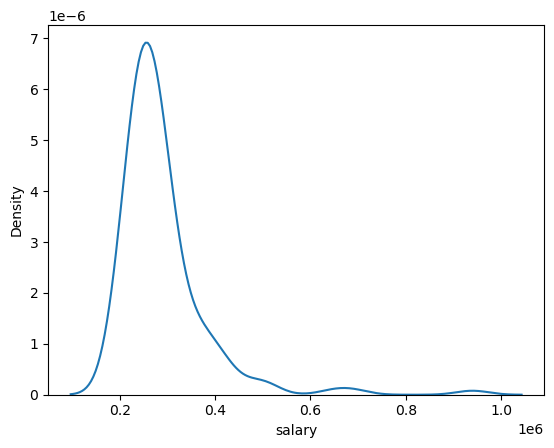

In [60]:
sns.kdeplot(y)

> Insight
* It is clear that very few students have salary greater than 400,000 (hence outliers)

In [61]:
y=y[y< 400000]
X=data_reg[data_reg['salary']<400000]
X=X.drop(['salary'],axis=1)
X.gender.count()

134

In [62]:
#Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [63]:
#Training the model
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [64]:
y_pred=lr.predict(X_test)

In [65]:
r2_score(y_pred,y_test)

-3.649151768078073

Text(0, 0.5, 'Predicted Salaries')

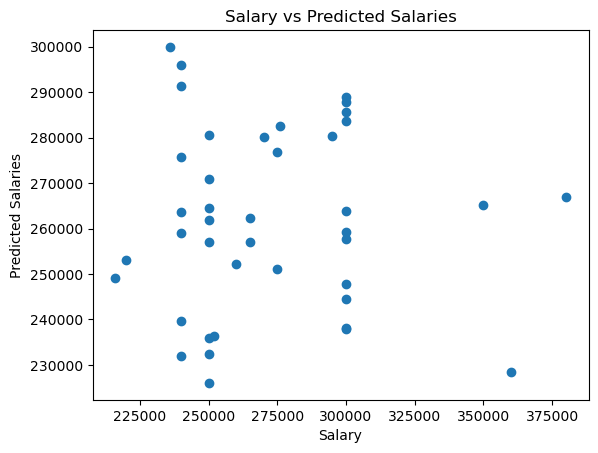

In [66]:
plt.scatter(y_test,y_pred)
plt.title('Salary vs Predicted Salaries')
plt.xlabel('Salary')
plt.ylabel('Predicted Salaries')